In [1]:
import numpy as np
import os
import cv2
import pandas as pd
import tensorflow as tf

In [3]:
from sklearn.model_selection import train_test_split

csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/multi-class-dataset/multi-class-dataset-augmented/labels.csv"
labels_df = pd.read_csv(csv_path)

train_df, val_df = train_test_split(labels_df, test_size=0.2, random_state=42)
for image_path in train_df['image_name']:
    print(image_path)

0_image_830.jpg
1_image_481.jpg
0_image_329.jpg
0_image_4.jpg
1_image_415.jpg
image_227.jpg
image_555.jpg
0_image_287.jpg
1_image_634.jpg
0_image_834.jpg
0_image_485.jpg
2_image_531.jpg
image_631.jpg
2_image_306.jpg
2_image_592.jpg
image_162.jpg
image_219.jpg
2_image_195.jpg
2_image_524.jpg
2_image_208.jpg
2_image_393.jpg
0_image_263.jpg
image_547.jpg
image_807.jpg
1_image_706.jpg
2_image_58.jpg
image_568.jpg
image_812.jpg
2_image_203.jpg
2_image_123.jpg
0_image_736.jpg
image_611.jpg
1_image_721.jpg
1_image_804.jpg
2_image_322.jpg
0_image_119.jpg
0_image_479.jpg
1_image_112.jpg
image_581.jpg
2_image_422.jpg
1_image_875.jpg
0_image_437.jpg
image_73.jpg
image_48.jpg
2_image_379.jpg
0_image_626.jpg
image_879.jpg
1_image_778.jpg
1_image_743.jpg
image_756.jpg
1_image_143.jpg
1_image_590.jpg
0_image_98.jpg
0_image_841.jpg
0_image_157.jpg
2_image_505.jpg
1_image_616.jpg
2_image_141.jpg
image_572.jpg
0_image_357.jpg
1_image_680.jpg
0_image_173.jpg
image_869.jpg
0_image_480.jpg
0_image_508.jpg


In [4]:
image_folder = "C:/Users/chuck/OneDrive/Desktop/Honors/multi-class-dataset/multi-class-dataset/images"

def preprocess_image(image_path, image_folder):
    file_path = os.path.join(image_folder,image_path)
    img = cv2.imread(file_path)
    img = cv2.resize(img, (300, 300))  # resize to model input size
    img_array = np.array(img)     # convert to numpy array
    return img_array

X_train = np.array([preprocess_image(image_path, image_folder) for image_path in train_df['image_name']])
X_val = np.array([preprocess_image(image_path, image_folder) for image_path in val_df['image_name']])

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [20]:
y_train = train_df[['good', 'crack', 'corrossion', 'finger_fault']].values
y_val = val_df[['good', 'crack', 'corrossion', 'finger_fault']].values

print(y_train)

[[0.   0.   0.66 0.  ]
 [0.33 0.   0.66 0.  ]
 [0.   1.   0.   0.  ]
 ...
 [1.   0.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]]


In [21]:
import tensorflow_hub as hub
# Load the pre-trained MobileNet v1 model from TensorFlow Hub
mobilenet = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/5")

# Define the new input shape
input_shape = (300, 300, 3)

# Define the new input layer with the desired shape
input_layer = tf.keras.layers.Input(shape=input_shape)

# Get the output of the original MobileNet model
x = mobilenet(input_layer)

# Add a new dense layer with 10 output units and a softmax activation
output_layer = tf.keras.layers.Dense(units=4, activation='softmax')(x)

# Build the new model with the original MobileNet model as the base
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
23/23 [==============================] - 18s 721ms/step - loss: 0.5692 - accuracy: 0.6119 - val_loss: 0.4675 - val_accuracy: 0.7740
Epoch 2/10
23/23 [==============================] - 15s 666ms/step - loss: 0.3965 - accuracy: 0.7436 - val_loss: 0.4136 - val_accuracy: 0.8023
Epoch 3/10
23/23 [==============================] - 15s 649ms/step - loss: 0.3649 - accuracy: 0.7564 - val_loss: 0.3573 - val_accuracy: 0.8192
Epoch 4/10
23/23 [==============================] - 15s 649ms/step - loss: 0.3287 - accuracy: 0.7550 - val_loss: 0.3162 - val_accuracy: 0.8079
Epoch 5/10
23/23 [==============================] - 15s 664ms/step - loss: 0.3018 - accuracy: 0.7805 - val_loss: 0.3030 - val_accuracy: 0.8249
Epoch 6/10
23/23 [==============================] - 16s 680ms/step - loss: 0.3128 - accuracy: 0.7833 - val_loss: 0.3421 - val_accuracy: 0.6949
Epoch 7/10
23/23 [==============================] - 15s 677ms/step - loss: 0.2967 - accuracy: 0.7819 - val_loss: 0.3368 - val_accuracy: 0.7288

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import keras

# Define the custom objects dictionary
custom_objects = {
    'KerasLayer': hub.KerasLayer
}

# Load the model with custom objects
model = keras.models.load_model("C:/Users/chuck/OneDrive/Desktop/Honors/models/model_binary_crossentropy.h5", custom_objects=custom_objects)

ValueError: Trying to load a model of incompatible/unknown type. 'C:\Users\chuck\AppData\Local\Temp\tfhub_modules\559b191f40a76a100f1012ec6c3ca9ca33cee79d' contains neither 'saved_model.pb' nor 'saved_model.pbtxt'.

(300, 300, 3)
1/1 [==============================] - 0s 64ms/step
[9.9012953e-01 7.5296708e-03 1.6087182e-04 2.1799786e-03]


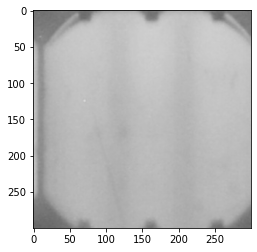

In [47]:
import matplotlib.pyplot as plt
import random
img = random.choice(X_val)
print(img.shape)
plt.imshow(img)
preds = model.predict(np.expand_dims(img, axis=0))
print(preds[0])

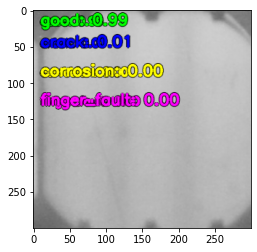

In [49]:
def write_numbers(image, numbers):
    # Define the font and font scale
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7

    # Define the position and color for each number label
    positions = [(10, 20), (10, 50), (10, 90), (10, 130)]
    colors = [(0, 169, 206), (0, 169, 206), (0, 169, 206), (0, 169, 206)]

    # Loop over each number and label, and write it onto the image
    for i, number in enumerate(numbers):
        label = f"{['good', 'crack', 'corrosion', 'finger_fault'][i]}: {number:.2f}"
        cv2.putText(image, label, positions[i], font, font_scale, (0,0,0), 3, cv2.LINE_AA)
        cv2.putText(image, label, positions[i], font, font_scale, colors[i], 2, cv2.LINE_AA)

    return image
image = write_numbers(image=img, numbers=preds[0])
plt.imshow(image)